In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import necessary moldules/packages

In [ ]:
import pandas as pd
import os
import numpy as np
import re
import json

## Declare helpful functions

In [ ]:
def read_txt(path):
    f = open(path, 'r')
    content = f.readlines()
    return content

In [ ]:
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"

multiple_dots = r'\.{2,}'

def split_into_sentences(text: str) -> list[str]:
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
    text = re.sub(multiple_dots, lambda match: "<prd>" * len(match.group(0)) + "<stop>", text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = [s.strip() for s in sentences]
    if sentences and not sentences[-1]: sentences = sentences[:-1]
    return sentences

## Preprocess CELLS dataset

### Split into sentences - Using regexes

In [ ]:
def preprocess_pls_retrieval_data(prefix, data_dir ="gdrive/MyDrive/thesis_data/CELLS/"):

  source_name = prefix+'.source'
  target_name = prefix+'.target'

  src_path = data_dir + source_name
  tgt_path = data_dir + target_name
  tgt_txt, src_txt = read_txt(tgt_path), read_txt(src_path)

  print("Number of abstracts: " + str(len(tgt_txt)))

  # scientific text
  tgt_txt_str = ' '.join(map(str, tgt_txt))
  tgt_sentences = split_into_sentences(tgt_txt_str)

  # plain text
  src_txt_str = ' '.join(map(str, src_txt))
  src_sentences = split_into_sentences(src_txt_str)

  # assign labels
  df = pd.DataFrame(data=(tgt_sentences + src_sentences),
                    columns =['SENTENCE'])

  df['CATEGORY']=1   # 0 for scientific text, 1 for plain text
  df.iloc[len(tgt_sentences):, 1]=0

  return df

In [ ]:
# test_df = preprocess_pls_retrieval_data('test')
# val_df = preprocess_pls_retrieval_data('val')
# train_df = preprocess_pls_retrieval_data('train')

### Split into sentences - Using spacy

In [ ]:
!pip install scispacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 687.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 6.3 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578648 sha256=96cc7948c00582963c532fff44e00af4caa64cc785c7d0846c41692cc5e06c42
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_core_sci_lg-0.5.3.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.2/531.2 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-sci-lg: filename=en_core_sci_lg-0.5.3-py3-none-any.whl size=531476666 sha256=0c21098254283b87916f1e625f959fbc2d886230b23c89c24fde45a804aa354d
  Stored in directory: /root/.cache/pip/wheels/98/42/c4/404d162d1ffdbae4329b3bcfdf2ed2af5afcb9fea4bd274736
Successfully built en-core-sci-lg


In [ ]:
#!python -m spacy download en_core_web_lg

In [ ]:
import spacy

nlp = spacy.load("en_core_sci_lg") #spacy.load("en_core_web_lg") #

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2141: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [ ]:
def spacy_pls_retrieval_data(prefix, data_dir ="gdrive/MyDrive/thesis_data/CELLS/"):

  source_name = prefix+'.source'
  target_name = prefix+'.target'

  src_path = data_dir + source_name
  tgt_path = data_dir + target_name
  tgt_txt, src_txt = read_txt(tgt_path), read_txt(src_path)

  print("Number of abstracts: " + str(len(tgt_txt)))

  tgt_sentences = []
  # scientific text
  for one_txt in tgt_txt:
    doc = nlp(one_txt)
    temp = [sent.text.strip() for sent in doc.sents]
    tgt_sentences= tgt_sentences+temp

  src_sentences = []
  # plain text
  for one_txt in src_txt:
    doc = nlp(one_txt)
    temp = [sent.text.strip() for sent in doc.sents]
    src_sentences= src_sentences+temp

  # assign labels
  df = pd.DataFrame(data=(tgt_sentences + src_sentences),
                    columns =['SENTENCE'])

  df['CATEGORY']=1   # 0 for scientific text, 1 for plain text
  df.iloc[len(tgt_sentences):, 1]=0

  return df

In [ ]:
test_df = spacy_pls_retrieval_data('test')
val_df = spacy_pls_retrieval_data('val')
train_df = spacy_pls_retrieval_data('train')

Number of abstracts: 6311
Number of abstracts: 11295
Number of abstracts: 45280


### Unify CELLS dataset and get info

In [ ]:
pls_retrieval_df = pd.concat([test_df, val_df, train_df])

In [ ]:
pls_retrieval_df['SENTENCE'].replace('', np.nan, inplace=True)
pls_retrieval_df.dropna(subset=['SENTENCE'], inplace=True)

In [ ]:
print("CELLS data: Intial number of sentences: "+ str(pls_retrieval_df.shape[0]))

CELLS data: Intial number of sentences: 1115283


In [ ]:
pls_retrieval_df.head()

,SENTENCE,CATEGORY
0,"Significance Endothelial cells ( ECs) , which ...",1
1,The present study uses a genetic approach to s...,1
2,Our findings demonstrate marked heterogeneity ...,1
3,The data generated in these studies advance ou...,1
5,Significance Epithelial cellular activating mo...,1


In [ ]:
print("CELLS data: Initial class distribution - 0 for scientific - 1 for plain text")
pls_retrieval_df['CATEGORY'].value_counts()

CELLS data: Initial class distribution - 0 for scientific - 1 for plain text


0    670823
1    444460
Name: CATEGORY, dtype: int64

In [ ]:
pls_retrieval_df = pls_retrieval_df.drop_duplicates(subset='SENTENCE', keep="first")
print("CELLS data: Final number of sentences: "+ str(pls_retrieval_df.shape[0])+"\n")
print("CELLS data: Final class distribution - 0 for scientific - 1 for plain text")
pls_retrieval_df['CATEGORY'].value_counts()

CELLS data: Final number of sentences: 1054992

CELLS data: Final class distribution - 0 for scientific - 1 for plain text


0    631478
1    423514
Name: CATEGORY, dtype: int64

## Preprocess PLABA dataset

### extract sentences

In [ ]:
data_filepath = "gdrive/MyDrive/thesis_data/nature/data.json"

In [ ]:
file = open(data_filepath)
data_json = json.load(file)
file.close()

data_keys=list(data_json.keys())
examined_articles = []

nature_df = pd.DataFrame(columns=['SENTENCE','CATEGORY'])

for one_quest in data_keys:

  articles = list(data_json[one_quest].keys())[1:-1] #.remove('question').remove('question_type')

  # keep articles not already examined
  articles = list(set(articles).difference(examined_articles))
  examined_articles = examined_articles+articles

  for one_aricle in articles:

    # get scientific text
    scient_dict = data_json[one_quest][one_aricle]['abstract']
    scient_list = list(scient_dict.values())
    scient_list =[i.strip() for i in scient_list]
    temp_df = pd.DataFrame(scient_list, columns =['SENTENCE'])
    temp_df['CATEGORY']=0
    nature_df = pd.concat([nature_df, temp_df])

    # get plain text
    plain_dict_keys = list(data_json[one_quest][one_aricle]['adaptations'].keys())

    for one_plain_key in plain_dict_keys:
      plain_dict = data_json[one_quest][one_aricle]['adaptations'][one_plain_key]
      plain_list = list(plain_dict.values())
      plain_list =[i.strip() for i in plain_list]
      temp_df = pd.DataFrame(plain_list, columns =['SENTENCE'])
      temp_df['CATEGORY']=1
      nature_df = pd.concat([nature_df, temp_df])

In [ ]:
nature_df.head()

,SENTENCE,CATEGORY
0,Background: Skeletal muscle cramps are common ...,0
1,"Typically, such cramps have no obvious underly...",0
2,Magnesium supplements are marketed for the pro...,0
3,This is an update of a Cochrane Review first p...,0
0,Skeletal muscle cramps are common and occur wi...,1


In [ ]:
print("PLABA data: Initial number of sentences: "+ str(nature_df.shape[0])+"\n")
print("PLABA data: Initial class distribution - 0 for scientific - 1 for plain text")
nature_df['CATEGORY'].value_counts()

PLABA data: Initial number of sentences: 16934

PLABA data: Initial class distribution - 0 for scientific - 1 for plain text


1    9322
0    7612
Name: CATEGORY, dtype: int64

In [ ]:
nature_df = nature_df.drop_duplicates(subset='SENTENCE', keep="first")
print("PLABA data: Final number of sentences: "+ str(nature_df.shape[0])+"\n")
print("PLABA data: Final class distribution - 0 for scientific - 1 for plain text")
nature_df['CATEGORY'].value_counts()

PLABA data: Final number of sentences: 16492

PLABA data: Final class distribution - 0 for scientific - 1 for plain text


1    8887
0    7605
Name: CATEGORY, dtype: int64

## Combine datasets and save

In [ ]:
final_df = pd.concat([pls_retrieval_df, nature_df])
output_dir = "gdrive/MyDrive/thesis_data/"
final_df.reset_index(drop=True, inplace=True)
# final_df.to_csv(output_dir+'sentences_data.csv', index=False)

In [ ]:
print("All data: Final number of sentences: "+ str(final_df.shape[0])+"\n")
print("All data: Final class distribution - 0 for scientific - 1 for plain text")
final_df['CATEGORY'].value_counts()

All data: Final number of sentences: 1071484

All data: Final class distribution - 0 for scientific - 1 for plain text


0    639083
1    432401
Name: CATEGORY, dtype: int64

## Extract dataset information/statistics

In [ ]:
import re

In [ ]:
final_df['COUNTS'] = final_df['SENTENCE'].apply(lambda x: len(re.findall(r'\w+', x)))
print("Final dataset stats")
print("Dataset average number of tokens per sentence: " + str(final_df['COUNTS'].mean()))
print("Dataset stdev of tokens per sentence: " + str(final_df['COUNTS'].std()))

Final dataset stats
Dataset average number of tokens per sentence: 24.008549824355754
Dataset stdev of tokens per sentence: 10.782851582631809


In [ ]:
nature_df['COUNTS'] = nature_df['SENTENCE'].apply(lambda x: len(re.findall(r'\w+', x)))
print("CELLS dataset stats")
print("Dataset average number of tokens per sentence: " + str(nature_df['COUNTS'].mean()))
print("Dataset stdev of tokens per sentence: " + str(nature_df['COUNTS'].std()))

CELLS dataset stats
Dataset average number of tokens per sentence: 24.375515401406744
Dataset stdev of tokens per sentence: 12.238640972568875


In [ ]:
pls_retrieval_df['COUNTS'] = pls_retrieval_df['SENTENCE'].apply(lambda x: len(re.findall(r'\w+', x)))
print("PLABA dataset stats")
print("Dataset average number of tokens per sentence: " + str(pls_retrieval_df['COUNTS'].mean()))
print("Dataset stdev of tokens per sentence: " + str(pls_retrieval_df['COUNTS'].std()))

PLABA dataset stats
Dataset average number of tokens per sentence: 24.002813291475196
Dataset stdev of tokens per sentence: 10.758437726662528


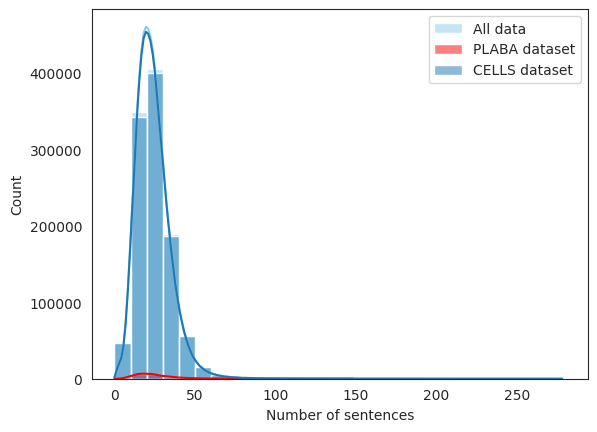

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set_style("white")

sns.histplot(data=final_df['COUNTS'], color="skyblue", label="All data", kde=True, binwidth=10)
sns.histplot(data=nature_df['COUNTS'], color="red", label="PLABA dataset", kde=True, binwidth=10)
hist = sns.histplot(data=pls_retrieval_df['COUNTS'], label="CELLS dataset", kde=True, binwidth=10)
hist.set_xlabel("Number of sentences")

plt.legend()
plt.show()

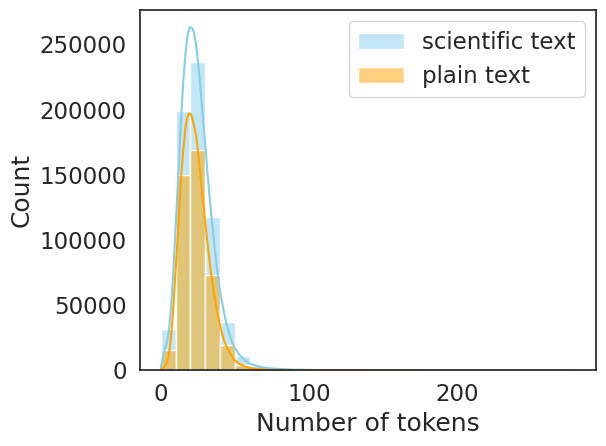

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("white")


compl_data = final_df[final_df['CATEGORY']==0]['COUNTS']
simple_data = final_df[final_df['CATEGORY']==1]['COUNTS']
sns.histplot(data=compl_data, color="skyblue", label="scientific text", kde=True, binwidth=10)
hist = sns.histplot(data=simple_data, color="orange", label="plain text", kde=True, binwidth=10)
hist.set_xlabel("Number of tokens")
#hist.set_title("All data", fontdict={'size': 15})

plt.legend()

plt.tight_layout()
plt.savefig("gdrive/MyDrive/thesis_data/alldata_token_distribution.png")
plt.show()


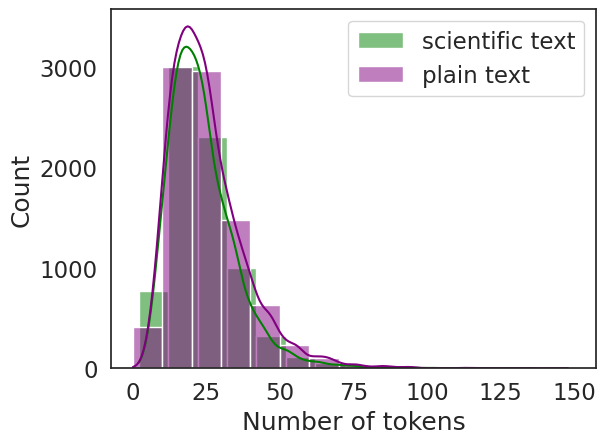

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("white")

compl_data = nature_df[nature_df['CATEGORY']==0]['COUNTS']
simple_data = nature_df[nature_df['CATEGORY']==1]['COUNTS']
sns.histplot(data=compl_data, color="GREEN", label="scientific text", kde=True, binwidth=10)
hist = sns.histplot(data=simple_data, color="purple", label="plain text", kde=True, binwidth=10)
hist.set_xlabel("Number of tokens")
#hist.set_title("CELLS dataset", fontdict={'size': 15})

plt.legend()
plt.tight_layout()
plt.savefig("gdrive/MyDrive/thesis_data/cells_token_distribution.png")
plt.show()

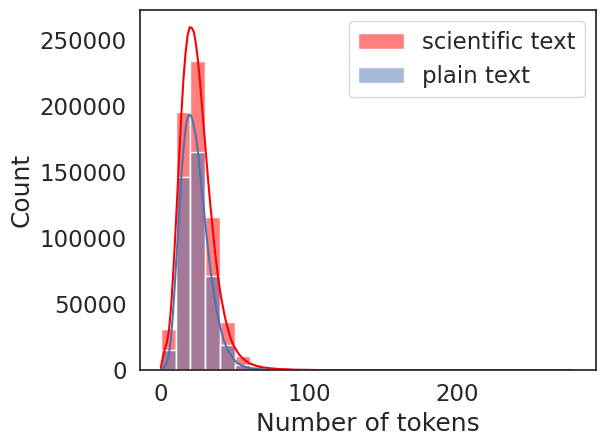

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("white")

compl_data = pls_retrieval_df[pls_retrieval_df['CATEGORY']==0]['COUNTS']
simple_data = pls_retrieval_df[pls_retrieval_df['CATEGORY']==1]['COUNTS']
sns.histplot(data=compl_data, color="red", label="scientific text", kde=True, binwidth=10)
hist = sns.histplot(data=simple_data, label="plain text", kde=True, binwidth=10)
hist.set_xlabel("Number of tokens")
#hist.set_title("PLABA data", fontdict={'size': 15})

plt.legend()
plt.tight_layout()
plt.savefig("gdrive/MyDrive/thesis_data/plaba_token_distribution.png")
plt.show()

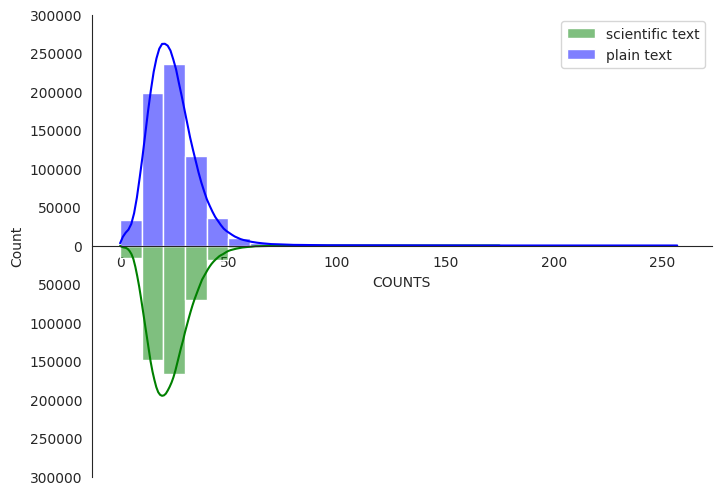

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(compl_data, kde=True, binwidth=10,
             color='green', label="scientific text")
for p in ax.patches:  # turn the histogram upside down
    p.set_height(-p.get_height())
for l in ax.lines:  # turn the kde curve upside down
    l.set_ydata(-l.get_ydata())

sns.histplot(simple_data, kde=True, binwidth=10,
             color='blue', label="plain text")

pos_ticks = np.array([t for t in ax.get_yticks() if t > 0])
ticks = np.concatenate([-pos_ticks[::-1], [0], pos_ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([f'{abs(t):.0f}' for t in ticks])
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.show()